In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('seaborn')

In [4]:
def load_data(filename, num_events):
    data = np.genfromtxt(filename)
    ped = data[:256].T
    width = 256
    
    channel_data = [[
            data[width * (i + 1):(i + 2) * width, ch]
         for i in range(num_events) 
        ]for ch in range(33)]
        
    return (np.asarray(channel_data), ped)

def plot_event(data,ch, ped, event=0, path=None):
    plt.plot(data[ch+1, event] - ped[ch+1], label='Evt:{}'.format(event))
    plt.legend()
    plt.title('Channel:Event | {}:{}'.format(ch, event))
    plt.xlabel('Time (100 ps)')
    plt.ylabel('ADC Counts')

    if path:
        directory = 'figs/{}'.format(path)
        if not os.path.exists(directory):
            os.makedirs(directory)
        plt.savefig('{}/ch{}-{}'.format(directory, ch, evente))

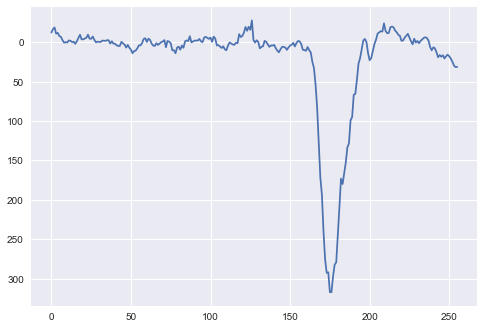

In [46]:
data, ped = load_data('data/test2.acdc.dat', 50)
# plot_event(data, 2, ped, 5)
t = np.arange(0, 256)
y = 20 * np.sin(2*np.pi / 105 *( t +22)) + 0
# plt.plot(t, y)
plt.plot(data[2+1, 5] - ped[2+1] - y)
plt.gca().invert_yaxis()

In [62]:
data[0]

array([    0.,     0.,  2805.,  2805.,  2752.,  2693.,  2762.,  2707.,
        2688.,  2614.,  2717.,  2682.,  2721.,  2636.,  2881.,  2802.,
        2863.,  2824.,  2866.,  2761.,  2749.,  2748.,  2618.,  2722.,
        2843.,  2716.,  2755.,  2756.,  2678.,  2551.,  2732.,  2647.,
           0.])

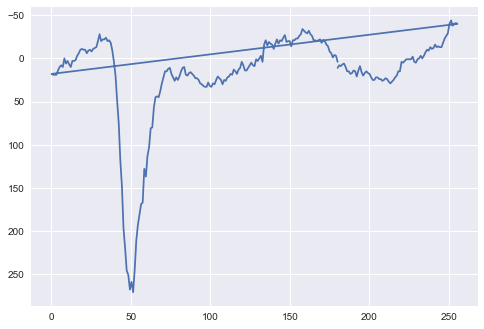

In [277]:
n = 1
shift = 76
t = np.linspace(-shift, -shift + 256, 256)
t = np.where(t < 0, t + 256, t)
y = data[3, n] - ped[3]
plt.plot(t, y)
plt.gca().invert_yaxis()

In [276]:
np.where(data[:, 1] == 76)

(array([0, 1], dtype=int64), array([ 76, 102], dtype=int64))

In [240]:
int('1696', 2)

ValueError: invalid literal for int() with base 2: '1696'